## Waste Management Using CNN Model

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"

In [3]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [4]:
# Visualization
import cv2
import pandas as pd
from tqdm import tqdm
from glob import glob
import os
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(os.path.basename(category))
data = pd.DataFrame({'image': x_data, 'label': y_data})


100%|██████████| 9999/9999 [00:15<00:00, 655.92it/s] 


In [5]:
data.shape

(22564, 2)

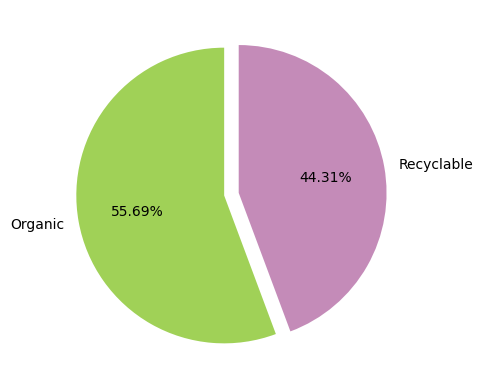

In [6]:
import matplotlib.pyplot as plt

colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle = 90, explode=[0.05,0.05])
plt.show()


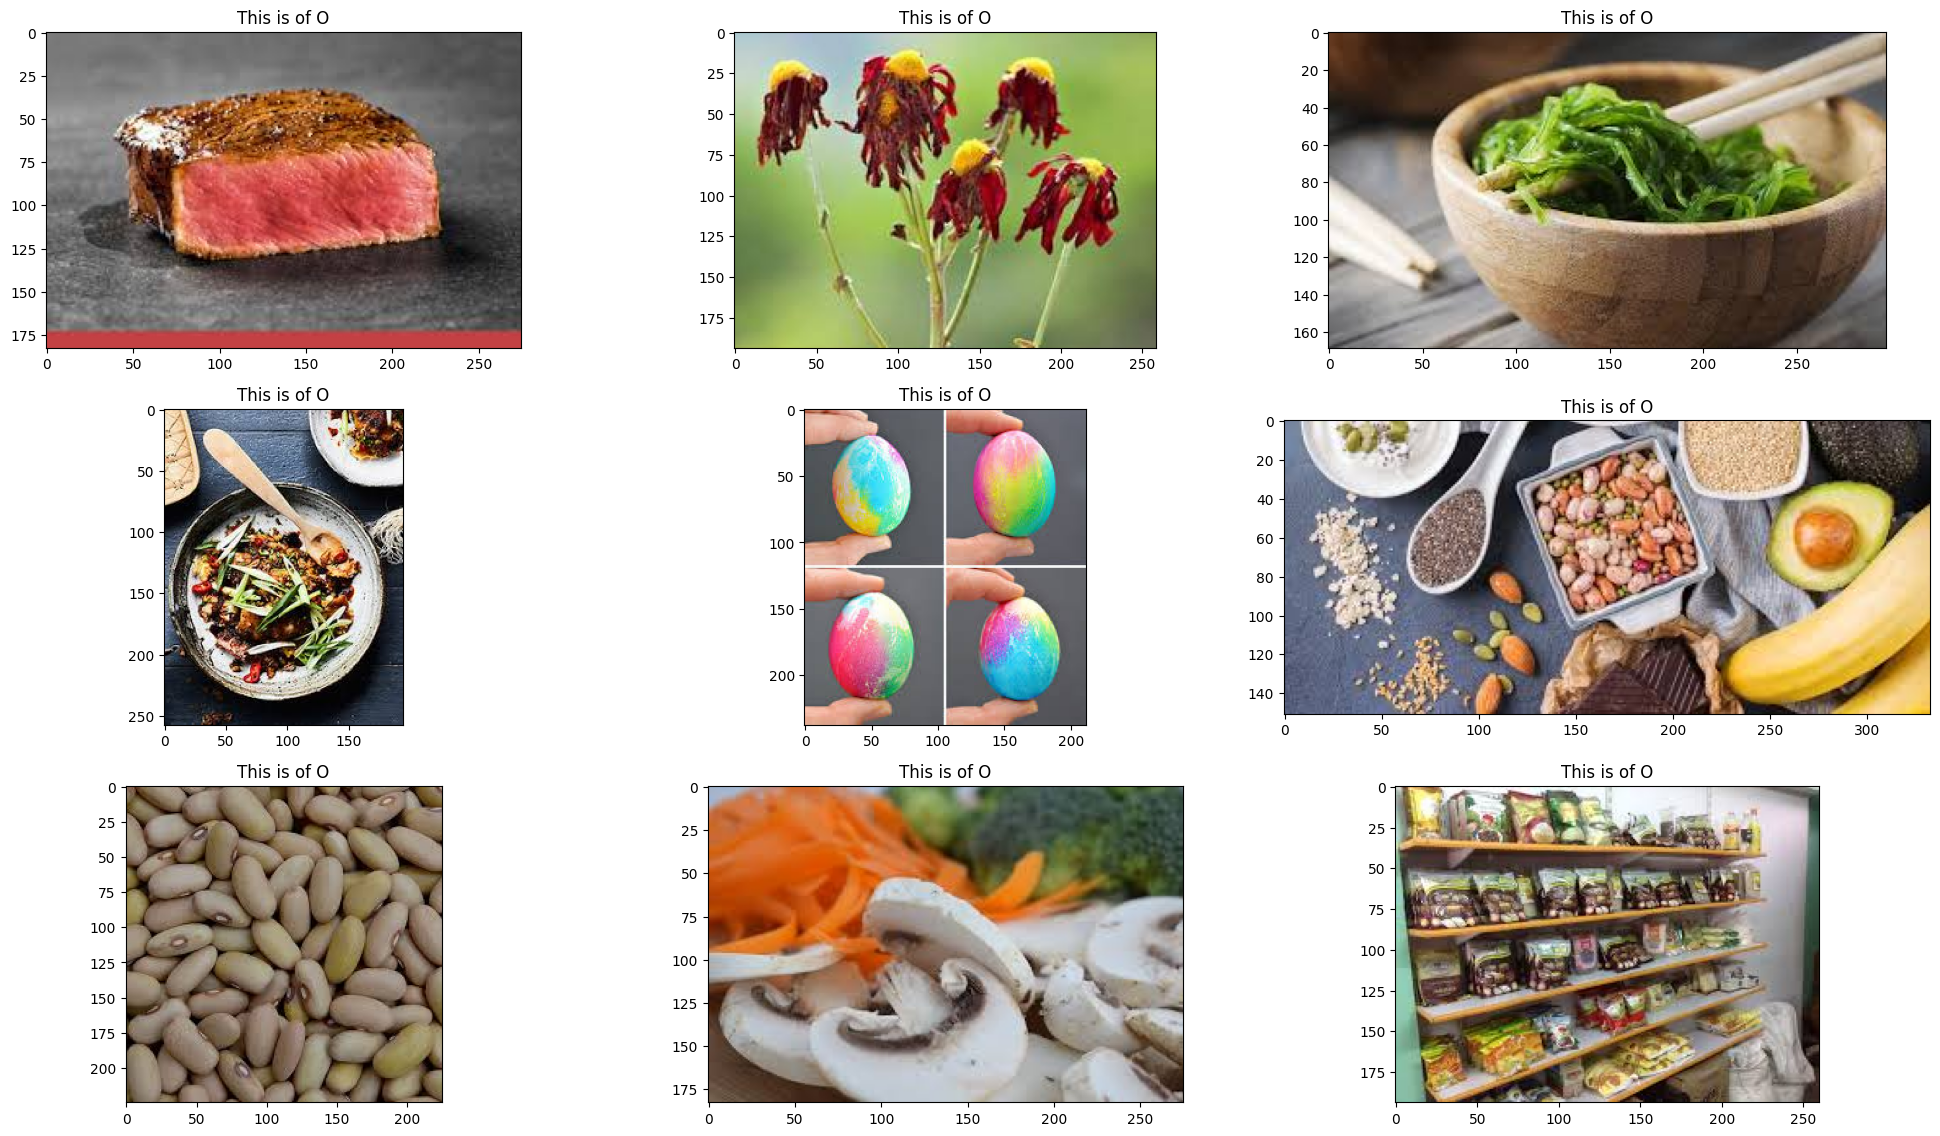

In [7]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

batch_size = 64


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)



Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [18]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
353/353 [==============================] - 1113s 3s/step - loss: 0.4592 - accuracy: 0.8044 - val_loss: 0.3594 - val_accuracy: 0.8540
Epoch 2/15
353/353 [==============================] - 1053s 3s/step - loss: 0.3943 - accuracy: 0.8404 - val_loss: 0.3344 - val_accuracy: 0.8731
Epoch 3/15
353/353 [==============================] - 1049s 3s/step - loss: 0.3456 - accuracy: 0.8618 - val_loss: 0.2911 - val_accuracy: 0.8850
Epoch 4/15
353/353 [==============================] - 1126s 3s/step - loss: 0.3199 - accuracy: 0.8728 - val_loss: 0.3516 - val_accuracy: 0.8683
Epoch 5/15
353/353 [==============================] - 1037s 3s/step - loss: 0.2816 - accuracy: 0.8893 - val_loss: 0.2943 - val_accuracy: 0.8838
Epoch 6/15
353/353 [==============================] - 1031s 3s/step - loss: 0.2409 - accuracy: 0.9079 - val_loss: 0.4093 - val_accuracy: 0.8452
Epoch 7/15
353/353 [==============================] - 1022s 3s/step - loss: 0.1921 - accuracy: 0.9283 - val_loss: 0.3537 - val_accuracy:

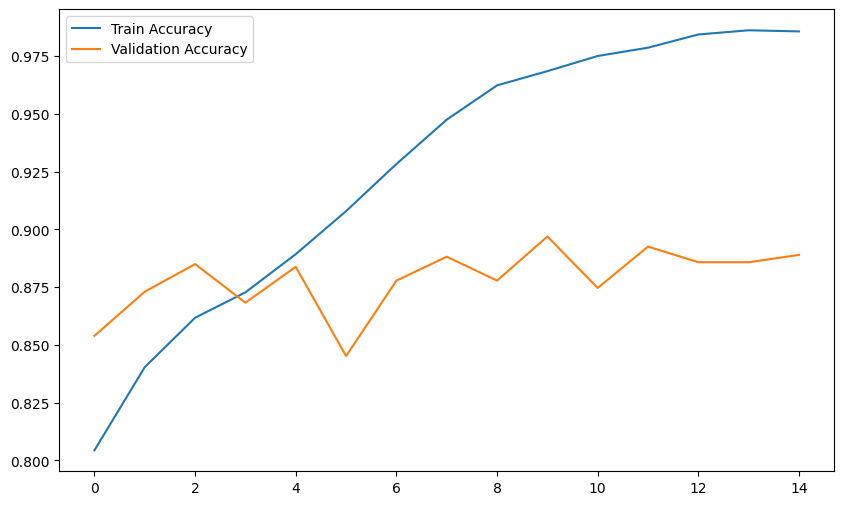

In [20]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

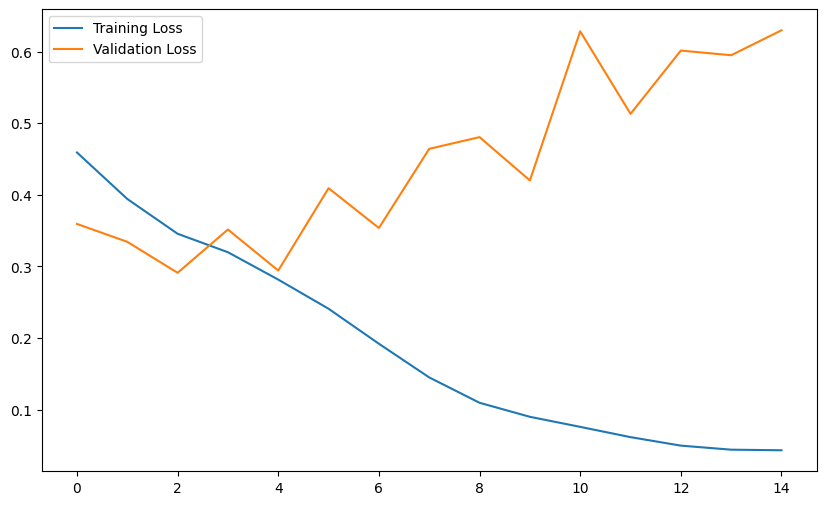

In [21]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [34]:
def predict_fun(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))
    if result == 0:
        print('The image shown is Recyclable Waste')
    elif result == 1:
        print('The image shown is Organic Waste')

The image shown is Organic Waste


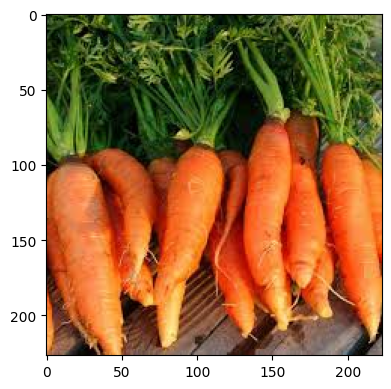

In [40]:
test_img = cv2.imread(r'C:\Users\MANOJ PESALAVARI\Pictures\Waste Classification\DATASET\TEST\O\O_12568.jpg')
predict_fun(test_img)

The image shown is Recyclable Waste


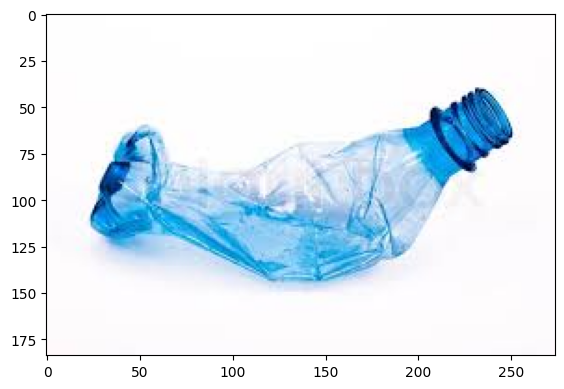

In [64]:
test_img = cv2.imread(r'C:\Users\MANOJ PESALAVARI\Desktop\waste classification\DATASET\TEST\R\R_4.jpg')
predict_fun(test_img)
